# Text Classification Using Naive Bayes

##### Importing Useful Module / Package

In [1]:
import numpy as np
import pandas as pd
import operator
import os,sys
from sklearn import model_selection
import re,string

##### This are stop_words in common taken from intenet.

In [2]:
stop_word=["a","about","above","after","again","against","all","am","an","and","any","are","as","at","be","because","been","before","being","below","between","both","but",
"by","could","did","do","does","doing","down","during","each","few","for","from","further","had","has","have","having","he","he'd","he'll","he's","her",
"here","here's","hers","herself","him","himself","his","how","how's","i","i'd","i'll","i'm","i've","if","in","into","is","it","it's","its","itself","let's","me",
"more","most","my","myself","nor","of","on","once","only","or","other","ought","our","ours","ourselves","out","over","own","same","she",
"she'd","she'll","she's","should","so","some","such","than","that","that's","the","their","theirs","them","themselves","then","there","there's",
"these","they","they'd","they'll","they're","they've","this","those","through","to","too","under","until","up","very","was","we","we'd",
"we'll","we're","we've","were","what","what's","when","when's","where","where's","which","while","who","who's","whom","why","why's","with",
"would","you","you'd","you'll","you're","you've","your","yours","yourself","yourselves"]


##### #X is a list further made in form of tuple , where first element is name of document and second is the text in documents.

##### #Y is the category'''

In [3]:
# Ma'am Please change the path of dataset as required
X  =[] 
Y = []
for category in os.listdir("F:/GitHub Repo's/IBM-Artificial-Intelligence-and-Machine-Learning-By-IBM-Watson/Final Projects 2 - Text Classification/Datasets"):
    for document in os.listdir("F:/GitHub Repo's/IBM-Artificial-Intelligence-and-Machine-Learning-By-IBM-Watson/Final Projects 2 - Text Classification/Datasets/"+category):
        with open("F:/GitHub Repo's/IBM-Artificial-Intelligence-and-Machine-Learning-By-IBM-Watson/Final Projects 2 - Text Classification/Datasets/"+category+'/'+document, "r") as f:
            X.append((document,f.read()))
            Y.append(category)

##### DataType of X and Y in detail

In [4]:
print(type(X))
print(type(Y))

<class 'list'>
<class 'list'>


##### We can see it is a tuple with first element as name of document and second text of document.

In [5]:
print(type(X[0]))
print(X[0])

<class 'tuple'>
('49960', 'Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:49960 alt.atheism.moderated:713 news.answers:7054 alt.answers:126\nPath: cantaloupe.srv.cs.cmu.edu!crabapple.srv.cs.cmu.edu!bb3.andrew.cmu.edu!news.sei.cmu.edu!cis.ohio-state.edu!magnus.acs.ohio-state.edu!usenet.ins.cwru.edu!agate!spool.mu.edu!uunet!pipex!ibmpcug!mantis!mathew\nFrom: mathew <mathew@mantis.co.uk>\nNewsgroups: alt.atheism,alt.atheism.moderated,news.answers,alt.answers\nSubject: Alt.Atheism FAQ: Atheist Resources\nSummary: Books, addresses, music -- anything related to atheism\nKeywords: FAQ, atheism, books, music, fiction, addresses, contacts\nMessage-ID: <19930329115719@mantis.co.uk>\nDate: Mon, 29 Mar 1993 11:57:19 GMT\nExpires: Thu, 29 Apr 1993 11:57:19 GMT\nFollowup-To: alt.atheism\nDistribution: world\nOrganization: Mantis Consultants, Cambridge. UK.\nApproved: news-answers-request@mit.edu\nSupersedes: <19930301143317@mantis.co.uk>\nLines: 290\n\nArchive-name: atheism/resources\nAlt-atheism-archi

##### And every particular element in a table is " String "

In [6]:
print(type(X[0][0]))
print(X[0][0])

<class 'str'>
49960


##### splitting the data in training and testing

In [7]:
x_train,x_test,y_train,y_test=model_selection.train_test_split(X,Y)

##### Verifying length of trained variable

In [8]:
print(len(x_train))
print(len(y_test))
print(len(x_train))
print(len(y_test))

14997
5000
14997
5000


##### Example for showing re.split

In [9]:
sample_text="Hey! I am Akash. I am superb. What are you doing there?"
print(re.split(r'\W+',sample_text))

['Hey', 'I', 'am', 'Akash', 'I', 'am', 'superb', 'What', 'are', 'you', 'doing', 'there', '']


##### Making Dictionary, of words with their corresponding frequency

In [10]:
dic={}
for i in range(len(x_train)):
    #Took [1] because [0] is name of doc and [1] is text in doc
    word=x_train[i][1].lower()
    #splitting the text into words
    stripped=re.split(r'\W+',word)
    #Iterating over each word
    for s in stripped:
        #we will not include stop_words, alpha-numerics, punctuations or irrelevant word of length less than 2 in our dictionary
        if not(s.isalpha()) or s in stop_word or len(s)<=2:
            continue
        if s in dic:
            dic[s]+=1
        else:
            dic[s]=1

##### Printing dic,  which have word along with their frequency

In [11]:
print(dic)

{'newsgroups': 15292, 'sci': 6539, 'space': 3430, 'path': 15277, 'cantaloupe': 19511, 'srv': 24262, 'cmu': 39324, 'edu': 123277, 'crabapple': 4689, 'pharabod': 3, 'subject': 16159, 'france': 150, 'spied': 18, 'message': 16448, 'added': 332, 'forwarded': 59, 'digest': 117, 'sender': 8273, 'news': 25657, 'organization': 14905, 'via': 689, 'international': 558, 'university': 7448, 'original': 966, 'isu': 91, 'vacation': 91, 'venari': 35, 'distribution': 3533, 'date': 15564, 'tue': 1771, 'apr': 15424, 'gmt': 13318, 'approved': 992, 'bboard': 48, 'lines': 15646, 'young': 607, 'french': 170, 'skeptic': 323, 'reads': 110, 'skeptically': 1, 'ufo': 14, 'review': 279, 'ovni': 1, 'presence': 150, 'sent': 483, 'following': 1338, 'excerpt': 21, 'august': 134, 'issue': 974, 'robert': 884, 'galley': 34, 'minister': 123, 'defense': 486, 'answering': 80, 'belgian': 3, 'wave': 206, 'can': 14999, 'conceive': 17, 'allow': 526, 'send': 1262, 'modern': 328, 'crafts': 6, 'foreign': 276, 'territory': 112, 'hi

##### Sorting the dictionary on basis of frequency of words and in descending order

In [12]:
sorted_dic = sorted(dic.items(), key=operator.itemgetter(1),reverse=True)
sorted_dic

[('edu', 123277),
 ('cmu', 39324),
 ('com', 37307),
 ('news', 25657),
 ('not', 25129),
 ('srv', 24262),
 ('cantaloupe', 19511),
 ('net', 19038),
 ('message', 16448),
 ('subject', 16159),
 ('lines', 15646),
 ('date', 15564),
 ('apr', 15424),
 ('newsgroups', 15292),
 ('path', 15277),
 ('can', 14999),
 ('organization', 14905),
 ('state', 14185),
 ('gmt', 13318),
 ('ohio', 11932),
 ('one', 11809),
 ('will', 11398),
 ('writes', 10944),
 ('article', 10090),
 ('references', 9699),
 ('comp', 9529),
 ('talk', 9354),
 ('misc', 8931),
 ('ans', 8281),
 ('sender', 8273),
 ('howland', 8231),
 ('reston', 8198),
 ('don', 7961),
 ('people', 7785),
 ('like', 7728),
 ('just', 7476),
 ('university', 7448),
 ('posting', 7311),
 ('nntp', 6993),
 ('know', 6870),
 ('mps', 6846),
 ('host', 6661),
 ('get', 6556),
 ('sci', 6539),
 ('usenet', 6307),
 ('think', 6290),
 ('zaphod', 6211),
 ('may', 6071),
 ('alt', 5979),
 ('politics', 5973),
 ('also', 5663),
 ('windows', 5533),
 ('rutgers', 5424),
 ('time', 5301),
 (

##### Importing Matplotlib Package

In [13]:
import matplotlib.pyplot as plt

##### No. of words vs frequency 

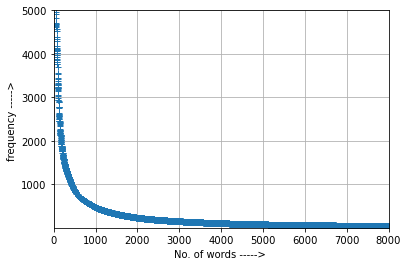

In [14]:
features=sorted_dic
answer1=[]
answer2=[]
for i in range(len(features)):
    answer1.append(i)
    answer2.append(features[i][1])
plt.plot(answer1,answer2,"+")
plt.axis([0,8000,1,5000])
plt.xlabel("No. of words -----> ")
plt.ylabel("frequency -----> ")
plt.grid()
plt.show()   

##### I decided to take top 2000 words with max freuqency as our feature here feature list is answer1

In [15]:
answer1=[features[i][0] for i in range(2000)]
answer1

['edu',
 'cmu',
 'com',
 'news',
 'not',
 'srv',
 'cantaloupe',
 'net',
 'message',
 'subject',
 'lines',
 'date',
 'apr',
 'newsgroups',
 'path',
 'can',
 'organization',
 'state',
 'gmt',
 'ohio',
 'one',
 'will',
 'writes',
 'article',
 'references',
 'comp',
 'talk',
 'misc',
 'ans',
 'sender',
 'howland',
 'reston',
 'don',
 'people',
 'like',
 'just',
 'university',
 'posting',
 'nntp',
 'know',
 'mps',
 'host',
 'get',
 'sci',
 'usenet',
 'think',
 'zaphod',
 'may',
 'alt',
 'politics',
 'also',
 'windows',
 'rutgers',
 'time',
 'eng',
 'harvard',
 'use',
 'near',
 'new',
 'rec',
 'good',
 'system',
 'crabapple',
 'soc',
 'sei',
 'noc',
 'well',
 'das',
 'xref',
 'now',
 'cis',
 'even',
 'god',
 'see',
 'europa',
 'max',
 'gtefsd',
 'religion',
 'ece',
 'world',
 'uunet',
 'way',
 'org',
 'make',
 'christian',
 'say',
 'much',
 'many',
 'two',
 'gov',
 'first',
 'right',
 'rochester',
 'distribution',
 'club',
 'space',
 'mail',
 'want',
 'andrew',
 'utexas',
 'anyone',
 'magnes

##### Making x_train dataset : No. of rows is equivalent to rows in x_train, and column is equal to length of answer1(feature list)

In [16]:
x_train_dataset=np.zeros([len(x_train),len(answer1)],int)
for i in range(len(x_train)):
    words=x_train[i][1].lower()
    word=re.split(r'\W+',words)
    #Iterating over each word
    for j in word:
        #We will add the frequency corresponding to that word only which is in our answer1(feature list)
        if j in answer1:
            x_train_dataset[i][answer1.index(j)]+=1

##### Making x_test dataset : No. of rows is equivalent to rows in x_test, and column is equal to length of answer1(feature list)

In [18]:
x_test_dataset=np.zeros([len(x_test),len(answer1)],int)
for i in range(len(x_test)):
    words=x_test[i][1].lower()
    word=re.split(r'\W+',words)
    #Iterating over each word
    for j in word:
        #We will add the frequency corresponding to that word only which is in our answer1(feature list)
        if j in answer1:
            x_test_dataset[i][answer1.index(j)]+=1

##### printing x_train and x_test dataset 

In [20]:
print(x_train_dataset)
print("<<< *** --- *** --- *** --- *** >>>")
print(x_test_dataset)

[[ 5  5  0 ...  0  0  0]
 [ 4  4  1 ...  0  0  0]
 [13  5  0 ...  0  0  0]
 ...
 [ 9  2  0 ...  0  0  0]
 [12  3  2 ...  0  0  0]
 [ 2  1  0 ...  0  0  0]]
<<< *** --- *** --- *** --- *** >>>
[[ 8  3 10 ...  0  0  0]
 [ 6  3  4 ...  0  0  0]
 [ 4  4 18 ...  5  0  0]
 ...
 [10  1  0 ...  0  0  0]
 [ 2  2  3 ...  0  0  0]
 [ 7  4  4 ...  0  0  0]]


##### Importing NAIVE BAYES Package

In [21]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

##### Training Model's

In [22]:
clf=MultinomialNB()
clf.fit(x_train_dataset,y_train)

MultinomialNB()

##### Prediction Score

In [24]:
y_pred=clf.predict(x_test_dataset)

print(y_pred)

['sci.space' 'sci.electronics' 'comp.windows.x' ...
 'soc.religion.christian' 'talk.politics.misc' 'rec.autos']


##### Training Score

In [25]:
print("Score on training data:",clf.score(x_train_dataset,y_train))

Score on training data: 0.8911782356471294


##### Testing Score

In [27]:
print("Score on testing data:",clf.score(x_test_dataset,y_test))

Score on testing data: 0.8564


##### Confusion - Matrix  

In [28]:
print(confusion_matrix(y_test,y_pred))

[[199   0   0   0   0   0   0   0   4   0   0   0   2   0   1   2   0   0
    1  31]
 [  0 214  11  24   7  11   4   1   1   1   0   2   7   2   2   0   0   0
    0   0]
 [  0   1 225  24   5  18   5   3   0   0   0   1   3   0   0   0   0   0
    0   0]
 [  1   7   4 213  24   0   5   0   0   0   0   0   6   0   0   0   0   0
    0   0]
 [  0   0   1  25 238   0   3   0   0   0   0   0   2   0   1   0   0   0
    0   0]
 [  0  16   9  10   3 196   1   0   1   0   0   0   3   0   1   0   0   0
    0   0]
 [  0   0   0   2   1   1 219   6   1   0   0   0   3   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   8 220   5   0   1   0   4   0   1   0   0   0
    0   0]
 [  0   0   0   0   0   0   7   6 247   1   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   1   1   0   3   4   3 205  12   0   0   0   1   0   0   0
    0   0]
 [  0   0   0   0   0   0   4   1   0  14 211   0   0   1   0   0   0   0
    0   0]
 [  0   1   0   1   2   0   0   1   1   0   0 226   5   1   0   0

##### Classification report